In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
users = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')
user_engagement = pd.read_csv('takehome_user_engagement.csv')

users.info()
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count  

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
#rename the column 'object_id' to 'user_id' so that the dataframes can be merged.
users.rename({'object_id': 'user_id'}, axis=1, inplace=True)

In [6]:
df = users.merge(user_engagement, on='user_id', how='inner')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     207917 non-null  int64  
 1   creation_time               207917 non-null  object 
 2   name                        207917 non-null  object 
 3   email                       207917 non-null  object 
 4   creation_source             207917 non-null  object 
 5   last_session_creation_time  207917 non-null  float64
 6   opted_in_to_mailing_list    207917 non-null  int64  
 7   enabled_for_marketing_drip  207917 non-null  int64  
 8   org_id                      207917 non-null  int64  
 9   invited_by_user_id          116887 non-null  float64
 10  time_stamp                  207917 non-null  object 
 11  visited                     207917 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 20.6+ MB


In [8]:
#change dates to datetime format
df.creation_time = pd.to_datetime(df.creation_time, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df.last_session_creation_time = pd.to_datetime(df.last_session_creation_time, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df.time_stamp = pd.to_datetime(df.time_stamp, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     207917 non-null  int64         
 1   creation_time               207917 non-null  datetime64[ns]
 2   name                        207917 non-null  object        
 3   email                       207917 non-null  object        
 4   creation_source             207917 non-null  object        
 5   last_session_creation_time  207917 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    207917 non-null  int64         
 7   enabled_for_marketing_drip  207917 non-null  int64         
 8   org_id                      207917 non-null  int64         
 9   invited_by_user_id          116887 non-null  float64       
 10  time_stamp                  207917 non-null  datetime64[ns]
 11  visited                     207917 non-

Decided to leave 'invited_by_user_id' null values as NaN. 

In [9]:
df.set_index('time_stamp').sort_index()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
time_stamp,,,,,,,,,,,
2012-05-31 08:20:06,10012,2012-05-31 08:20:06,Spikes Danille,DanilleJSpikes@hotmail.com,ORG_INVITE,1970-01-01 00:00:01.338452406,0,1,225,7104.0,1
2012-05-31 15:47:36,3428,2012-05-31 15:47:36,Spears Arthur,ArthurJSpears@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.352821656,1,0,166,NaN,1
2012-05-31 17:19:37,9899,2012-05-31 17:19:37,Jørgensen Sofie,SofieNJrgensen@yahoo.com,ORG_INVITE,1970-01-01 00:00:01.338484777,0,0,138,9899.0,1
2012-05-31 21:58:33,1693,2012-05-31 21:58:33,Faulkner Hayden,HaydenFaulkner@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.399931913,0,1,50,NaN,1
2012-06-01 00:17:30,6102,2012-06-01 00:17:30,Morrison Natasha,NatashaMorrison@gustr.com,ORG_INVITE,1970-01-01 00:00:01.339719450,0,0,34,6102.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2014-06-04 23:32:13,4625,2013-02-17 23:32:13,Wannemaker Tim,goyfedfr@sqclx.com,ORG_INVITE,1970-01-01 00:00:01.401924733,0,0,0,8927.0,1
2014-06-04 23:34:04,9325,2012-09-28 23:34:04,Taylor Steven,StevenFTaylor@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.401924844,0,0,252,NaN,1
2014-06-04 23:46:31,9558,2012-10-05 23:46:31,Christiansen Anders,jzxqmman@pjcjm.com,SIGNUP,1970-01-01 00:00:01.401925591,0,0,80,NaN,1


In [10]:
df['moving_sum'] = df.groupby('user_id')['visited'].transform(lambda x: x.rolling(7, 1).sum())


In [11]:
df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,moving_sum
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,2014-04-22 03:53:30,1,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-11-15 03:45:04,1,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-11-29 03:45:04,1,2
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-12-09 03:45:04,1,3
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2013-12-25 03:45:04,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89,8263.0,2013-09-06 06:14:15,1,1
207913,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200,NaN,2013-01-15 18:28:37,1,1
207914,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83,8074.0,2014-04-27 12:45:16,1,1
207915,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6,NaN,2012-06-02 11:55:59,1,1


In [12]:
df.moving_sum.value_counts()

7    188709
1      8823
2      2588
3      2248
4      2007
5      1826
6      1716
Name: moving_sum, dtype: int64

In [13]:
df.drop(['time_stamp'], axis=1)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,moving_sum
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1,2
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1,3
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
207912,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89,8263.0,1,1
207913,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200,NaN,1,1
207914,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83,8074.0,1,1
207915,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6,NaN,1,1


In [14]:
df['moving_sum_max'] = df['moving_sum'].where(df['user_id'] == df['user_id']).groupby(df['user_id']).transform('max')


In [15]:
df.moving_sum_max.value_counts()

7    198495
1      6235
4       724
3       723
2       680
5       550
6       510
Name: moving_sum_max, dtype: int64

In [16]:
df.drop(['moving_sum', 'time_stamp'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df.moving_sum_max.value_counts()

1    6235
7    1631
2     340
3     241
4     181
5     110
6      85
Name: moving_sum_max, dtype: int64

In [17]:
df['adopted'] = df['moving_sum_max'] >= 3
df.head(50)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,moving_sum_max,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1,1,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1,7,True
15,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,1,1,False
16,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,1,1,False
17,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,1,1,False
18,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.387424226,0,0,197,11241.0,1,1,False
19,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1970-01-01 00:00:01.356009872,0,1,37,NaN,1,1,False
20,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1970-01-01 00:00:01.401833283,1,1,318,4143.0,1,7,True
304,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1970-01-01 00:00:01.388116554,0,0,69,NaN,1,1,False
305,13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,1970-01-01 00:00:01.396196378,0,0,254,11204.0,1,1,False


In [18]:
df['adopted'].value_counts(normalize=True)

False    0.745211
True     0.254789
Name: adopted, dtype: float64

<b>Adopted users make up 25% of the users.</b>
<br> This means that the dataset is somewhat imbalanced, but it is not extreme. 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 207916
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          4776 non-null   float64       
 10  visited                     8823 non-null   int64         
 11  moving_sum_max              8823 non-null   int64     

In [20]:
#examine the invited_by_user_id column values. 
df.invited_by_user_id.value_counts()

4612.0     10
11770.0     9
2308.0      9
1525.0      8
6808.0      8
           ..
3689.0      1
8847.0      1
11961.0     1
743.0       1
1600.0      1
Name: invited_by_user_id, Length: 2229, dtype: int64

 'invited_by_user_id' does not look like it will be a good predictor based on the different user IDs. However, whether or not a user was invited by another user may affect the outcome, so a new binary column, invited_by_user will be added.


In [21]:
df['invited_by_user'] = df['invited_by_user_id'] > 0


In [22]:
df.org_id.value_counts()

0      228
1      172
2      150
3      125
4      122
      ... 
322      6
400      6
397      5
386      4
416      2
Name: org_id, Length: 417, dtype: int64

The org_id column will be dropped as the values here won't have much meaning for initial analysis.

<b>Columns that are not necessary for prediction will be dropped.</b>

In [23]:
df.drop(['creation_time', 'last_session_creation_time', 'moving_sum_max', 'invited_by_user_id', 'user_id', 'name', 'email', 'visited', 'org_id'], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 207916
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   creation_source             8823 non-null   object
 1   opted_in_to_mailing_list    8823 non-null   int64 
 2   enabled_for_marketing_drip  8823 non-null   int64 
 3   adopted                     8823 non-null   bool  
 4   invited_by_user             8823 non-null   bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 293.0+ KB


In [24]:
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,invited_by_user
0,GUEST_INVITE,1,0,False,True
1,ORG_INVITE,0,0,True,True
15,ORG_INVITE,0,0,False,True
16,GUEST_INVITE,0,0,False,True
17,GUEST_INVITE,0,0,False,True


Visualize some of the features of interest...

<AxesSubplot:xlabel='adopted'>

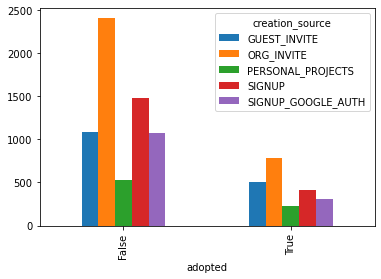

In [25]:
df.groupby(['creation_source','adopted'])['creation_source'].count().unstack(level=0).plot(kind='bar')


<AxesSubplot:xlabel='adopted'>

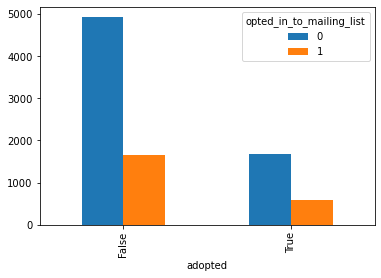

In [26]:
df.groupby(['opted_in_to_mailing_list','adopted'])['opted_in_to_mailing_list'].count().unstack(level=0).plot(kind='bar')


The proportion of adopted users that opted in to the mailing list seems higher in the adopted group

<AxesSubplot:xlabel='adopted'>

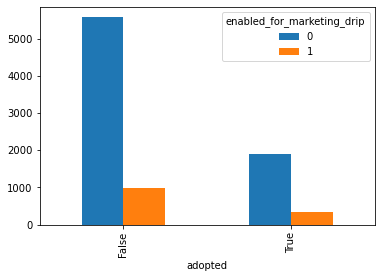

In [27]:
df.groupby(['enabled_for_marketing_drip','adopted'])['enabled_for_marketing_drip'].count().unstack(level=0).plot(kind='bar')


<AxesSubplot:xlabel='adopted'>

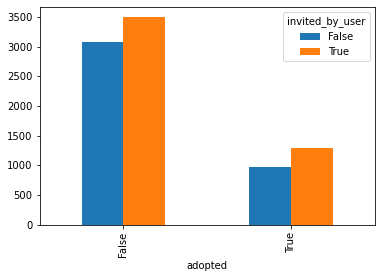

In [28]:
df.groupby(['invited_by_user','adopted'])['invited_by_user'].count().unstack(level=0).plot(kind='bar')


Based on visualizations above, without doing a statistical test, there are no extremely clear predictors of adoption. The predictive models will help to clear this up.

In [29]:
#create dummy variables for 'creation_source' and drop the original column
from sklearn.preprocessing import OneHotEncoder
dummies_creation_source = pd.get_dummies(df['creation_source'])

# merging the dummy variable columns into the dataset and saving as new dataframe (df2)
df = pd.concat([df, dummies_creation_source], axis=1)
df= df.drop(['creation_source'], axis=1)
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,invited_by_user,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,False,True,1,0,0,0,0
1,0,0,True,True,0,1,0,0,0
15,0,0,False,True,0,1,0,0,0
16,0,0,False,True,1,0,0,0,0
17,0,0,False,True,1,0,0,0,0


<AxesSubplot:xlabel='adopted'>

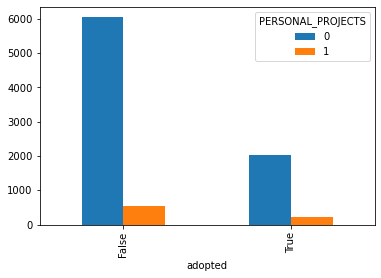

In [30]:
df.groupby(['PERSONAL_PROJECTS','adopted'])['PERSONAL_PROJECTS'].count().unstack(level=0).plot(kind='bar')


The proportion of adopted users invited to join another's personal workspace seems to be higher in the adopted user group

<AxesSubplot:xlabel='adopted'>

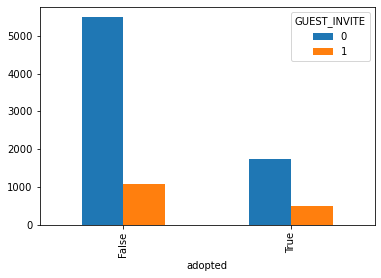

In [31]:
df.groupby(['GUEST_INVITE','adopted'])['GUEST_INVITE'].count().unstack(level=0).plot(kind='bar')


The proportion of adopted users invited to join as a guest appears higher in adopted users.

<AxesSubplot:xlabel='adopted'>

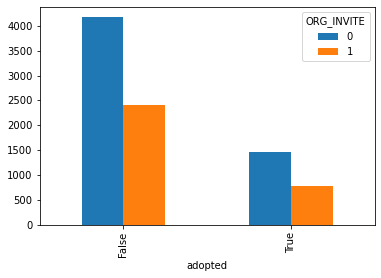

In [32]:
df.groupby(['ORG_INVITE','adopted'])['ORG_INVITE'].count().unstack(level=0).plot(kind='bar')


The proportion invited to an organization is higher in adopted users

<AxesSubplot:xlabel='adopted'>

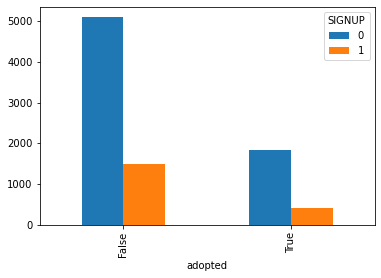

In [33]:
df.groupby(['SIGNUP','adopted'])['SIGNUP'].count().unstack(level=0).plot(kind='bar')


There is no clear difference between the 2 groups based on signup via the website.

The dataset is now ready for machine learning

Since this is a classification problem (adopted vs not adopted user), it is a supervised learning problem. Logistic regression, SVM (with 'linear' kernel), and random forest will be run on the dataset.


In [39]:
X = df.drop(['adopted'], axis=1) #feature columns
y = df.adopted #target variable

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle=True, random_state=42, stratify=y)

print('number of negative training samples: ', len(y_train[y_train==0]))
print('number of positive training samples: ', len(y_train[y_train==1]))
print('total number of  training samples: ', len(y_train))
print('total number of test samples: ', len(y_test))
print('number of negative test samples: ', len(y_test[y_test==0]))
print('number of positive test samples: ', len(y_test[y_test==1]))

#Confirming target variable counts
y.value_counts()
print(len(y[y==1]), 'out of ', len(y), ' customers (', round(len(y[y==1])*100/len(y),1), '%) remained active after 6 months.')

number of negative training samples:  4602
number of positive training samples:  1574
total number of  training samples:  6176
total number of test samples:  2647
number of negative test samples:  1973
number of positive test samples:  674
2248 out of  8823  customers ( 25.5 %) remained active after 6 months.


In [40]:
#import models for evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


lr=LogisticRegression(random_state = 42, solver='lbfgs')
svm = SVC(random_state=42, gamma='auto', probability=True, kernel='linear')
rf = RandomForestClassifier(random_state=42, n_estimators=100)

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [41]:
model = lr
y_train_preds = model.predict_proba(X_train)[:,1]


In [42]:
model = svm
y_train_preds_svm = model.predict_proba(X_train)[:,1]


In [43]:
model=rf
y_train_preds_rf = model.predict_proba(X_train)[:,1]


In [44]:
#Create functions to calculate performance metrics
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_prevalence(y_actual):
    # calculates prevalence
    return sum((y_actual == 1)) /len(y_actual)


Logistic Regression Performance Metrics

AUC:
Train:0.560

Accuracy:
Train:0.745

Recall:
Train:0.000

Precision:
Train:nan

Specificity
Train:1.000

Prevalence
Train:0.255


<ipython-input-44-47a4577b2d64>:12: RuntimeWarning: invalid value encountered in long_scalars
  return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)


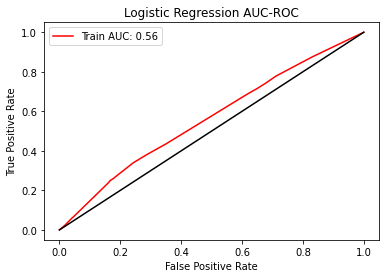

In [45]:
#LOGISTIC REGRESSION
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds)

print("\nLogistic Regression Performance Metrics\n")
print('AUC:')
print('Train:%.3f'%auc_train)

print('\nAccuracy:')
print('Train:%.3f'%calc_accuracy(y_train, y_train_preds, thresh))

print('\nRecall:')
print('Train:%.3f'%calc_recall(y_train, y_train_preds, thresh))

print('\nPrecision:')
print('Train:%.3f'%calc_precision(y_train, y_train_preds, thresh))

print('\nSpecificity')
print('Train:%.3f'%calc_specificity(y_train, y_train_preds, thresh))

print('\nPrevalence')
print('Train:%.3f'%calc_prevalence(y_train))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot([0,1],[0,1],'-k')
plt.title('Logistic Regression AUC-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


SVM Performance Metrics

Train AUC:0.500
Train accuracy:0.745
Train recall:0.000
Train precision:nan
Train specificity:1.000
Train prevalence:0.255


<ipython-input-44-47a4577b2d64>:12: RuntimeWarning: invalid value encountered in long_scalars
  return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)


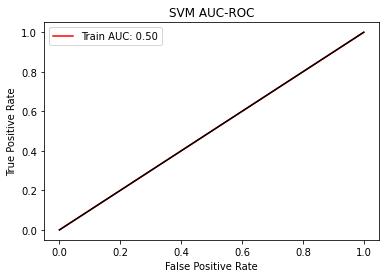

In [46]:
#svm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds_svm)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds_svm)
print("\nSVM Performance Metrics\n")
print('Train AUC:%.3f'%auc_train)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds_svm, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds_svm, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds_svm, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds_svm, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot([0,1],[0,1],'-k')
plt.title('SVM AUC-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Random Forest Performance Metrics

Train AUC:0.566
Train accuracy:0.745
Train recall:0.000
Train precision:nan
Train specificity:1.000
Train prevalence:0.255


<ipython-input-44-47a4577b2d64>:12: RuntimeWarning: invalid value encountered in long_scalars
  return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)


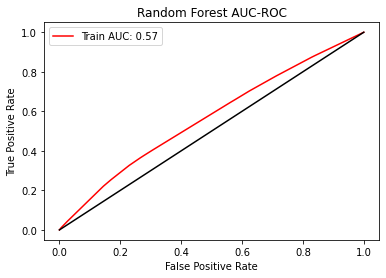

In [47]:
#RF
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds_rf)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds_rf)
print("\nRandom Forest Performance Metrics\n")
print('Train AUC:%.3f'%auc_train)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds_rf, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds_rf, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds_rf, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds_rf, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot([0,1],[0,1],'-k')
plt.title('Random Forest AUC-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The random forest and logistic regression were close. 

In [48]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",rf.feature_importances_.transpose())
coef_table

,0,Coefs
0,opted_in_to_mailing_list,0.115620
1,enabled_for_marketing_drip,0.102120
2,invited_by_user,0.122711
3,GUEST_INVITE,0.288403
4,ORG_INVITE,0.143572
5,PERSONAL_PROJECTS,0.094244
6,SIGNUP,0.085345
7,SIGNUP_GOOGLE_AUTH,0.047986


GUEST_INVITE, ORG_INVITE, and invited_by_user were the top predictors for random forest.

In [49]:
lr.coef_


array([[ 0.04952743,  0.02272508,  0.11793509,  0.29311446, -0.17517937,
         0.23289172, -0.19729734, -0.15392349]])

In [50]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table

,0,Coefs
0,opted_in_to_mailing_list,0.049527
1,enabled_for_marketing_drip,0.022725
2,invited_by_user,0.117935
3,GUEST_INVITE,0.293114
4,ORG_INVITE,-0.175179
5,PERSONAL_PROJECTS,0.232892
6,SIGNUP,-0.197297
7,SIGNUP_GOOGLE_AUTH,-0.153923


GUEST_INVITE, PERSONAL_PROJECTS, and INVITED_BY_USER were the top predictors for logistic regression.

In summary, those users who were invited were more likely to become adopted users, which makes sense since this indicates they already had an interest in using the product. Additionally, those who were invited to work on another user's personal workspace were also more likely to become an adopted user. 

To gain more business, the company could offer incentives to users and organizations to encourage them to invite others to try the product.

With further optimization, the models would provide more insight. Additionally, since 'invited_by_user' seems like it might be repetitive (since many of the other columns relate to type of invitation), a correlation matrix could be created to determine if this column should be removed.